# Individual Planning Stage (DSCI 100 Group Project)
Student Name: Vicky Tan

Project Group: 004-27

TA: Jordan

In [1]:
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. Data Description

### Dataset #1: players.csv

In [2]:
url_players <- "https://raw.githubusercontent.com/vckytn22/DSCI-100-004-27-Individual-Planning-Stage-Vicky-Tan/refs/heads/main/players.csv"
players_data <- read_csv(url_players)
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### Summary Statistics for Dataset #1
#### Origin
- `players_data` details the identity of players and was collected through the recording of players' actions in Minecraft servers
- collected by Pacific Laboratory of Artificial Intelligence (PLAI), a research group in Computer Science at the University of British Columbia led by Frank Wood
  
#### Overall Summary
- 196 observations
- 7 variables

#### Name of Variables and Types
- `experience` is character type, meaning it represents text values
- `subscribe` is logical type, meaning it contains boolean values, TRUE or FALSE, for each corresponding observation
- `hashedEmail` is character type, meaning it stores text values
- `played_hours` is double(numeric) type, meaning it records decimal numbers
- `name` is character type, meaning it displays text values
- `gender` is characer type, meaning it shows text values
- `Age` is double(numeric) type, meaning it shows numbers and in this case integers

#### Variable Description
- `experience` is the level of expertise
- `subscribe` is whether or not the player has a subcription
- `hashedEmail` is their email identifier
- `played_hours` is the number of hours spent on the game
- `name` is the player's name
- `gender` is the player's gender
- `Age` is the player's age in years
#### Potential Issues
- `median_played_hours` is 0.1, suggesting the majority of observations report 0 played hours
  - may present some difficulty in analyzing `played_hours` as the data is highly skewed towards no play time, which results in limited variation

Numerical Summary of `played_hours` in Table Below

In [5]:
played_hours_summary <- players_data |>
    summarize(
        mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
        median_played_hours = round(median(played_hours, na.rm = TRUE), 2),
        standard_deviation_played_hours = round(sd(played_hours, na.rm = TRUE), 2),
        min_played_hours = round(min(played_hours, na.rm = TRUE), 2),
        max_played_hours = round(max(played_hours, na.rm = TRUE), 2))
played_hours_summary

mean_played_hours,median_played_hours,standard_deviation_played_hours,min_played_hours,max_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0.1,28.36,0,223.1


Numerical Summary of `Age` in Table Below

In [6]:
age_summary <- players_data |>
    summarize(
        mean_age = round(mean(Age, na.rm = TRUE), 2),
        median_age = round(median(Age, na.rm = TRUE), 2),
        standard_deviation_age = round(sd(Age, na.rm = TRUE), 2),
        min_age = min(Age, na.rm = TRUE),
        max_age = max(Age, na.rm = TRUE))
age_summary

mean_age,median_age,standard_deviation_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,19,7.39,9,58


### Dataset #2: sessions.csv

In [7]:
url_sessions <- "https://raw.githubusercontent.com/vckytn22/DSCI-100-004-27-Individual-Planning-Stage-Vicky-Tan/refs/heads/main/sessions.csv"
sessions_data <- read_csv(url_sessions)
head(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Summary Statistics for Dataset #2

#### Origin
- `sessions_data` records the exact start and end times, including dates, of each player's Minecraft gaming session
  - formatted in DD/MM/YYYY HH/MM and UNIX time
- collected by Pacific Laboratory of Artificial Intelligence (PLAI), a research group in Computer Science at the University of British Columbia led by Frank Wood
  
#### Overall Summary
- 1535 observations
- 5 variables

#### Name of Variables and Types
- `hashedEmail` is character type, meaning it stores text values
- `start_time` and `end_time` are character types, meaning they contain text values
  - however, they can be converted into POSIXct, a date-time class in R
- `original_start_time` and `original_end_time` are double (numeric type), meaning numerals that represent the miliseconds

#### Variable Description
- `hashedEmail` is their email identifier
- `start_time` is the time when the player started gaming, down to the exact minute of the date
- `end_time` is the time when the player stopped gaming, down to the exact minute of the date
- `original_start_time` is the game's start in UNIX format
- `original_end_time` is the game's end in UNIX format

#### Potential Issues
- Some precision of the UNIX timestamps may be lost as it is stored in miliseconds, resulting is large numbers that an inefficient for analysis.
- There is no timezone specification in `start_time` and `end_time`, therefore if R applies an incorrect timezone during calculation, the session time will be inaccurate. 

Numerical Summary of `original_start_time` and `original_end_time` in Table Below

In [14]:
original_start_time_summary <- sessions_data |>
    summarize(
        mean_original_start_time = round(mean(original_start_time, na.rm = TRUE), 2),
        median_original_start_time = round(median(original_start_time, na.rm = TRUE), 2),
        standard_deivation_original_start_time = round(sd(original_start_time, na.rm = TRUE), 2),
        min_original_start_time = min(original_start_time, na.rm = TRUE),
        max_original_start_time = max(original_start_time, na.rm = TRUE))
original_start_time_summary

original_end_time_summary <- sessions_data |>
    summarize(
        mean_original_end_time = round(mean(original_end_time, na.rm = TRUE), 2),
        median_original_end_time = round(median(original_end_time, na.rm = TRUE), 2),
        standard_deivation_original_end_time = round(sd(original_end_time, na.rm = TRUE), 2),
        min_original_end_time = min(original_end_time, na.rm = TRUE),
        max_original_end_time = max(original_end_time, na.rm = TRUE))
original_end_time_summary

mean_original_start_time,median_original_start_time,standard_deivation_original_start_time,min_original_start_time,max_original_start_time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,1.7192e+12,3557491589,1.7124e+12,1.72733e+12


mean_original_end_time,median_original_end_time,standard_deivation_original_end_time,min_original_end_time,max_original_end_time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.719196e+12,1.71918e+12,3552813134,1.7124e+12,1.72734e+12


Numerical Summary of `session_length` in Table Below
- `start_time` and `end_time` were converted into POSIXct format to find `session_length`
- `session_length` is double(numeric) type, representing the duration of one session in minutes
    - variable shows how long players game per session
    - this approach was taken because finding the summary statistics of time-of-day or dates is not straightforward and entirely logical

In [8]:
sessions_data_converted <- sessions_data |>
    mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time))
session_length_data <- sessions_data_converted |>
    mutate(session_length = as.numeric(difftime(end_time, start_time, units = "mins")))

session_length_summary <- session_length_data |>
    summarize(
        mean_session_length = round(mean(session_length, na.rm = TRUE), 2),
        median_session_length = round(median(session_length, na.rm = TRUE), 2),
        standard_deivation_session_length = round(sd(session_length, na.rm = TRUE), 2),
        min_session_length = min(session_length, na.rm = TRUE),
        max_session_length = max(session_length, na.rm = TRUE))
session_length_summary

mean_session_length,median_session_length,standard_deivation_session_length,min_session_length,max_session_length
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
50.86,30,55.57,3,259


## 2. Questions

Broad Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question: Can **average session length**, **age**, and **experience** predict if a player is subscribed to the game? 

### How the Data will Address the Question of Interest/Justification of Variable Selection
- 3 Predictor Variables: `average_session_length`, `Age`, and `experience`
- `average_session_length` can indicate the player's interest in the game and their engagement habits
    - longer session lengths should correspond to a higher chance of subscription
    - (how `average_session_length` is obtained will be covered in the next section)
- `Age` can influence a player's financial ability to afford subscription, the amount of time they can play, and their likelihood of enjoying it, as Minecraft's primary target audience is children and teenagers
- `experience`, though subjective, can inform on skill and engagement level
    - more skillful players, Pro or Veteran, have a higher chance of being subscribed

## 3. Exploratory Data Analysis and Description

The two datasets have already been loaded into R in section 1, data description. This was done because it was necessary to determine their numerical summary statistics. 

### Wrangling Data into Tidy Format Below

#### Thought Process for Session Length Data Wrangling
- `session_length_data` records each gaming session as a new observation, thus repeating the same player information
- KNN classification would process the same player as multiple different ones, biasing predictions toward players with more sessions
- to avoid this issue, the average session length for each player will be used instead

#### Thought Process for Finalized Tidy Data
- `players_data` and `average_session_length_data`, should be joined together by matching players' hashed emails
    - ensures that `average_session_length` corresponds to the correct subscription status
- desired predictor variables should then be selected to form a tibble
    - `subscription_data` can then display the information of 196 unique players

In [9]:
average_session_length_data <- session_length_data |>
    group_by(hashedEmail) |>
    summarize(average_session_length = mean(session_length, na.rm = TRUE))

subscription_data <- players_data |>
    left_join(average_session_length_data, by = "hashedEmail") |>
    select(subscribe, experience, Age, average_session_length)
head(subscription_data)

subscribe,experience,Age,average_session_length
<lgl>,<chr>,<dbl>,<dbl>
TRUE,Pro,9,74.77778
TRUE,Veteran,17,85.00000
FALSE,Veteran,17,5.00000
TRUE,Amateur,21,50.00000
TRUE,Regular,21,9.00000
TRUE,Amateur,17,NA


The means of age and average session length are shown in the table below.

In [10]:
subscription_summary <- subscription_data |>
    summarize(
        mean_age = round(mean(Age, na.rm = TRUE), 2),
        mean_of_average_session_length = round(mean(average_session_length, na.rm = TRUE), 2))
subscription_summary

mean_age,mean_of_average_session_length
<dbl>,<dbl>
21.14,32.51


### Data Visualization and Description

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


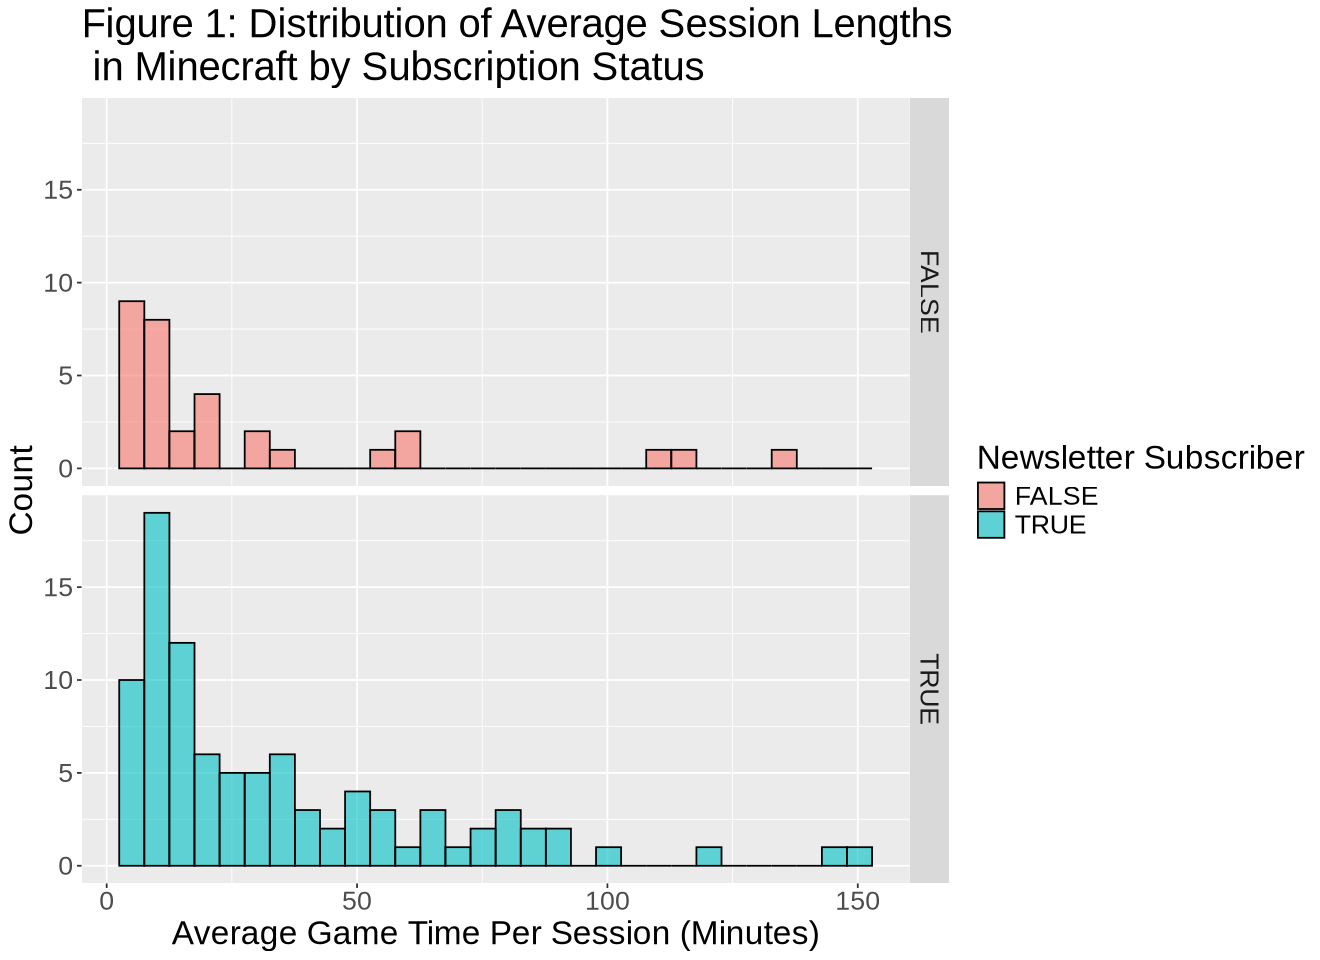

In [11]:
options(repr.plot.width = 11, repr.plot.height = 8)

session_histogram <- subscription_data |>
    ggplot(aes(x = average_session_length, fill = subscribe)) +
    geom_histogram(alpha = 0.6, position = "identity", colour = "black") +
    facet_grid(rows = vars(subscribe)) +
    labs(x = "Average Game Time Per Session (Minutes)", y = "Count", fill = "Newsletter Subscriber") +
    ggtitle("Figure 1: Distribution of Average Session Lengths \n in Minecraft by Subscription Status") +
    theme(text = element_text(size=20))
session_histogram

Figure 1 graphs show that majority of players are subscribed and game for less than 50 minutes per session, regardless of subscription status. However, beyond that range, longer average gaming sessions are much more common among subscribers than non-subscribers. This suggests that longer average gaming sessions are associated with a higher likelihood of subscription, indicating a positive relationship between average play duration and chance of being subscribed.

Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


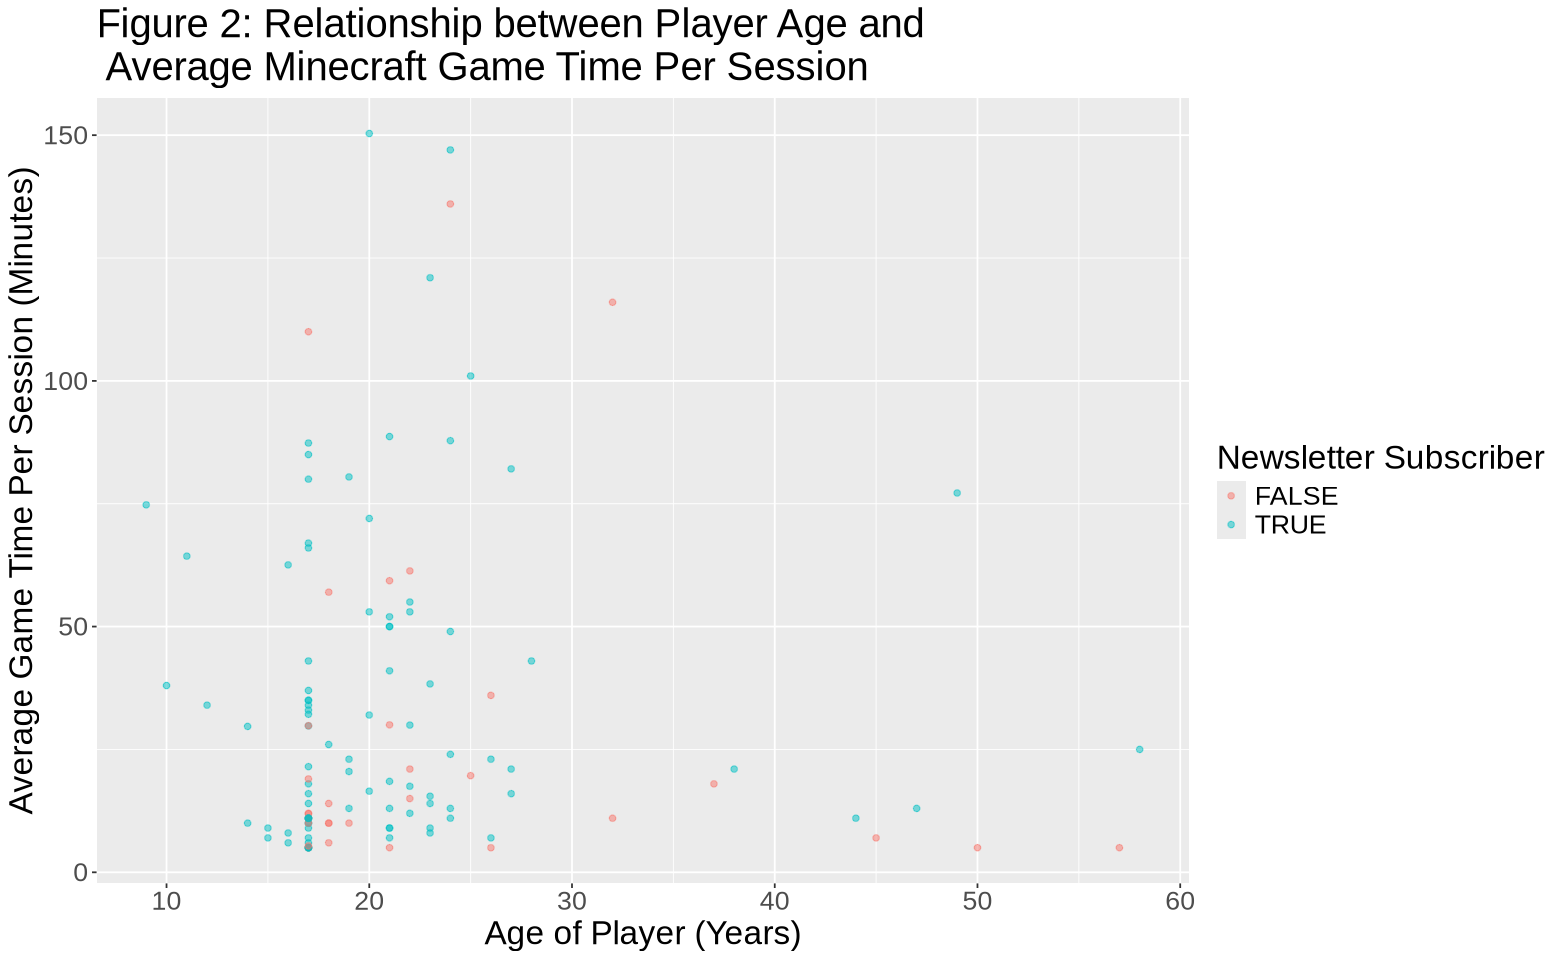

In [15]:
options(repr.plot.width = 13, repr.plot.height = 8)

age_session_plot <- subscription_data |>
    ggplot(aes(x = Age, y = average_session_length)) +
    geom_point(aes(color = subscribe), alpha = 0.5) +
    labs(x = "Age of Player (Years)", y = "Average Game Time Per Session (Minutes)", color = "Newsletter Subscriber") +
    ggtitle("Figure 2: Relationship between Player Age and \n Average Minecraft Game Time Per Session") +
    theme(text = element_text(size=20))
age_session_plot

Figure 2 suggests that young players below 30 tend to have longer session lengths, but this relationship is weak due to high variability. Many younger players also play for under 50 minutes per session. Furthermore, most points representing players under 30 are blue, indicating a higher subscription rate among younger players. Thus, a negative relationship between age and likelihood of subscription. However, it appears that the data is skewed towards younger ages as there are a lack of data points representing older players. Therefore, the observed trends are uncertain due to the imbalance in age distribution.

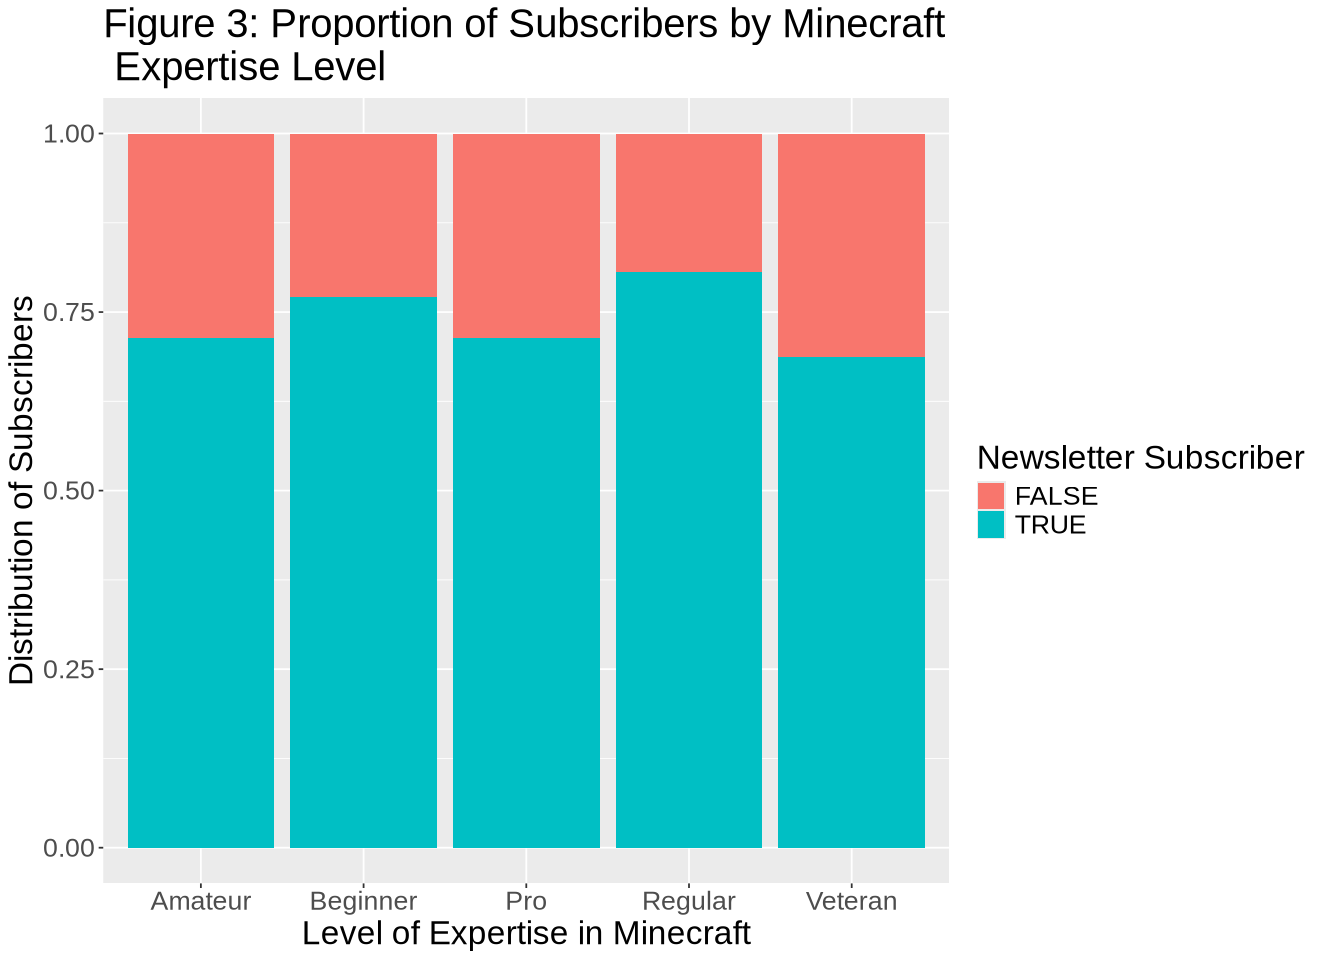

In [13]:
options(repr.plot.width = 11, repr.plot.height = 8)

experience_plot <- subscription_data |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs( x = "Level of Expertise in Minecraft", y = "Distribution of Subscribers", fill = "Newsletter Subscriber") +
    ggtitle("Figure 3: Proportion of Subscribers by Minecraft \n Expertise Level") +
    theme(text = element_text(size = 20))
experience_plot

Figure 3 shows that subscription rates are fairly consistent across all expertise levels, with each group made up of approximately 75% subscribers and 25% non-subscribers. Because the proportions are similar across categories, there is no clear relationship between expertise level and the likelihood of being subscribed. Thus, this variable will not be used as a predictor. However, it does align with Figure 1 in showing that most players are subscribed to the newsletter.

## 4. Methods and Plan

### Chosen Method
- K-nearest Neighbor (KNN) Classification
- Predictor Variables: `Age` and `average_session_length`
- Target Variable: `subscribe`
### Reasons for Selection
#### Method's Suitability
- KNN classification predicts a categorical variable using numerical predictors, which aligns with this analysis.
    - Target variable is subscription status, which is categorical.
    - Predictor variables, `Age` and `average_session_length`, are numerical.
    - All predictors, which are numerical, can be used to compute distances for classifying a player's subscription status.
#### Exclusion of `experience` Variable
- `experience` has been excluded as it shows little relation to subscription status. 
- As a note, although `experience` is a categorical variable, it can be encoded numerically using an ordinal scale, if one wished to include it.
    - E.g. Amateur = 1, Veteran = 5
#### Assumptions Required to Apply Method
- Predictors must be numeric for distance calculations.
- Numerical scales of the predictors should be standardized to prevent any predictor from dominating distance calculations.
- Closeness of data points represents similarity, thus a class boundary between subscribers and non-subscribers should exist.
- Little to no extreme outliers should be present, as they can mislead class assignments significantly.
#### Method's Potential Limitations
- Struggles with noisy or overlapping class boundaries.
- Requires optimal choice of k value to prevent overfitting or underfitting the data.
- Model slows with large data sets as it stores every single value.
- Lack of interpretability, does not provide insight into relationships.
- May perform poorly with class imbalance, resulting in biased predictions.
#### Processing Data to Apply Model
- The data should be split into a training set and testing set using a 75/25 proportion, which is a standard split ratio applied throughout this course.
- Create a recipe and model specification, then add them to a workflow to fit the training data.
- Training set will be further split to complete 5 fold cross validation, also commonly used in the course, to yield the accuracies of different k values.
- The k value producing the highest accuracy will be selected for the final KNN classification model.

## 5. GitHub Repository

Link: https://github.com/vckytn22/DSCI-100-004-27-Individual-Planning-Stage-Vicky-Tan.git